<a href="https://colab.research.google.com/github/CPernet/ReproducibleQuantitativeDataScience/blob/main/ProvenanceInPractice_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Provenance in Practice

Let's make a very simple example showcasing the need for provenance in practice!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

<ipython-input-1-9edb724eaaec>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Data

I will provide you with some data. I will claim this shows the association between temperature measured during summer days in Copenhagen and how many scoops of ice cream I eat.

In [2]:
rng = np.random.RandomState(1)
x = 30 * rng.rand(50)
y = 1/12 * x + rng.randn(50) + 1

# ice cream consumption
ICC = pd.DataFrame({'temperature [Celsius]': x,
                       'ice cream [# scoops]': y})

We can look at the data inside the pandas dataframe:

In [3]:
ICC

,temperature [Celsius],ice cream [# scoops]
0,12.510660,1.355382
1,21.609735,1.955606
2,0.003431,0.329040
3,9.069977,1.743167
4,4.402677,0.249579
5,2.770158,1.465262
6,5.587806,3.125453
7,10.366822,2.605946
8,11.903024,1.800083
9,16.164502,1.459413


We can also easily visualize the data:

Text(0, 0.5, 'Scoops of ice cream Melanie eats [# of scoops]')

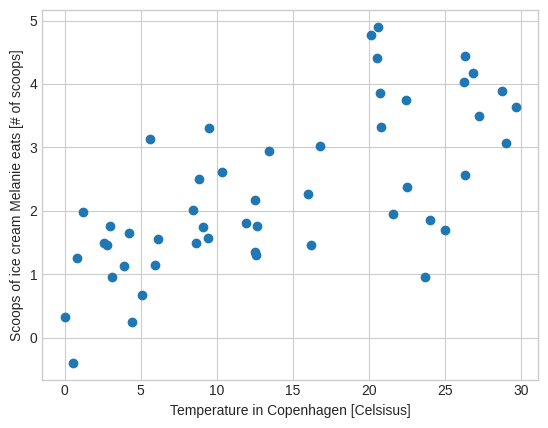

In [4]:
plt.scatter(ICC['temperature [Celsius]'], ICC['ice cream [# scoops]']);
plt.xlabel('Temperature in Copenhagen [Celsisus]')
plt.ylabel('Scoops of ice cream Melanie eats [# of scoops]')

We can also save the data as a .csv file.

In [5]:
ICC.to_csv('MelsIceCreamHabits.csv')

## Conclusion of Melanie's Data Analysis

Now I have analyzed this data and come to the following conlusion:

Whenever the temperature hits 40 degrees Celsius in Copenhagen, Melanie will eat 5.7 scoops of ice cream.

## Can you arrive at the same conclusion?

Let's see if you can! I gave you the data and a simple problem, try and reproduce my "scientific" result.

# Solution
## Straightforward solution

Simple linear regression doesn't seem to tell me what was done.

At a temparature of [[40]] degrees Celsius, Melanie eats [4.69754039] scoops of ice cream.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Scoops of ice cream Melanie eats [# of scoops]')

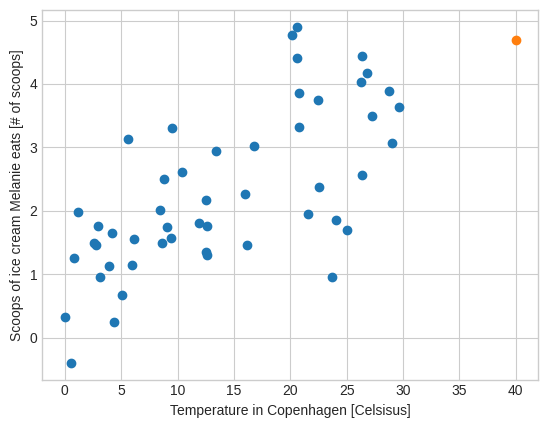

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(ICC[['temperature [Celsius]']], ICC['ice cream [# scoops]'])
xfit = np.array([[40]])
yfit = model.predict(xfit)
print('At a temparature of '+str(xfit)+' degrees Celsius, Melanie eats '+str(yfit)+' scoops of ice cream.')

plt.scatter(ICC['temperature [Celsius]'], ICC['ice cream [# scoops]']);
plt.scatter(xfit[0][0], yfit[0]);
plt.xlabel('Temperature in Copenhagen [Celsisus]')
plt.ylabel('Scoops of ice cream Melanie eats [# of scoops]')

## Undocumented data cleaning

Initially there were some outliers in my data. For example a negative scoop of ice cream doesn't make sense. So I actually removed that data point from my data frame.

In [7]:
ICC_clean = ICC[ICC['ice cream [# scoops]']>0]

Now I can build the same model as I did before:

At a temparature of [[40]] degrees Celsius, Melanie eats [4.59934032] scoops of ice cream.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Scoops of ice cream Melanie eats [# of scoops]')

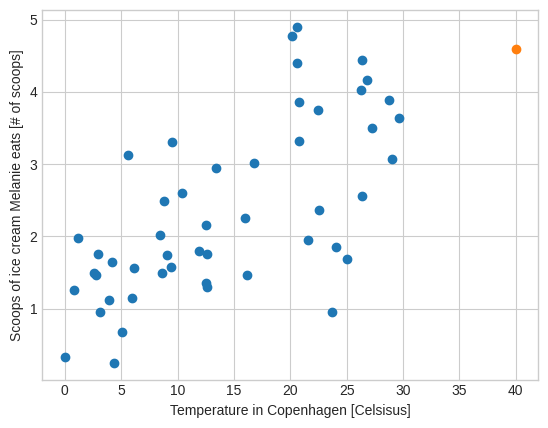

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(ICC_clean[['temperature [Celsius]']], ICC_clean['ice cream [# scoops]'])
xfit = np.array([[40]])
yfit = model.predict(xfit)
print('At a temparature of '+str(xfit)+' degrees Celsius, Melanie eats '+str(yfit)+' scoops of ice cream.')

plt.scatter(ICC_clean['temperature [Celsius]'], ICC_clean['ice cream [# scoops]']);
plt.scatter(xfit[0][0], yfit[0]);
plt.xlabel('Temperature in Copenhagen [Celsisus]')
plt.ylabel('Scoops of ice cream Melanie eats [# of scoops]')

## Undocumented model assumptions

Now of course I assumed that at zero temperature I would eat zero ice-cream. So I set the intercept to "False" and forced it through zero.

At a temparature of [[40]] degrees Celsius, Melanie eats [5.70006751] scoops of ice cream.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Scoops of ice cream Melanie eats [# of scoops]')

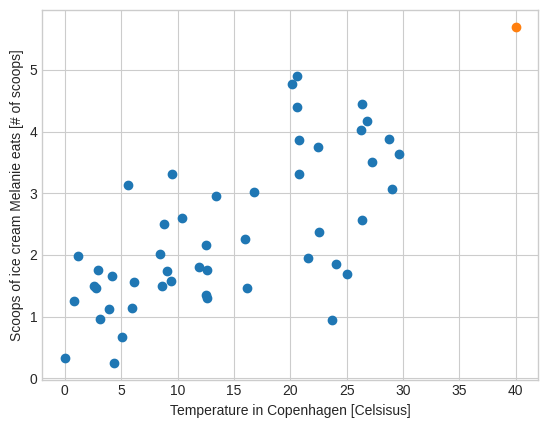

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)

model.fit(ICC_clean[['temperature [Celsius]']], ICC_clean['ice cream [# scoops]'])
xfit = np.array([[40]])
yfit = model.predict(xfit)
print('At a temparature of '+str(xfit)+' degrees Celsius, Melanie eats '+str(yfit)+' scoops of ice cream.')

plt.scatter(ICC_clean['temperature [Celsius]'], ICC_clean['ice cream [# scoops]']);
plt.scatter(xfit[0][0], yfit[0]);
plt.xlabel('Temperature in Copenhagen [Celsisus]')
plt.ylabel('Scoops of ice cream Melanie eats [# of scoops]')

Through some trial and error, I have arrived at the right solution! But even though this was such a simple problem, it took quite some time to understand and redo the analysis. Imagine what can happen if the analysis is more complicated!
Therefore provenance of data and analysis are important steps when working with data and producing scientific analysis.